In [458]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-price/Mobile phone price.csv


In [459]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [460]:
#Load the dataset 
df=pd.read_csv('/kaggle/input/mobile-phone-price/Mobile phone price.csv')

In [461]:
#show the first 5 elemnts of the data 
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


### Data preprocessing

In [463]:
#check for null values 
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [464]:
#check for duplicates 
df.duplicated().sum()

26

In [465]:
#drop duplicates 
df.drop_duplicates(inplace = True)

In [466]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [467]:
df.columns = df.columns.str.replace(" ","_")

In [468]:
df['Model'].unique()

array(['iPhone 13 Pro', 'Galaxy S21 Ultra', '9 Pro', 'Redmi Note 10 Pro',
       'Pixel 6', 'iPhone 13', 'Galaxy Z Flip3', 'Poco X3 Pro',
       'Reno6 Pro+ 5G', 'X70 Pro+', 'Nord CE 5G', 'Galaxy A52s 5G',
       'GT Neo2', 'iPhone 12 Mini', 'Find X3 Pro', 'Mi 11 Lite 5G NE',
       'Galaxy S21', 'Y20s (G)', '8s 5G', 'A94', 'Redmi 10 Prime',
       'Galaxy A22 5G', 'Narzo 50 Pro 5G', '9', 'Redmi Note 10 Pro Max',
       'iPhone 11', 'Galaxy A03s', 'A74 5G', 'Y12s (2021)', '9i',
       'Galaxy M52 5G', 'Redmi 10', 'iPhone SE (2nd Gen)', 'A53s', 'Y33s',
       'C25s', 'Galaxy A22 4G', 'Nord 2 5G', 'Poco M3 Pro 5G',
       'iPhone XR', 'A16', 'C21Y', 'Galaxy F22', 'F19 Pro+ 5G', 'Mi 11X',
       'V21e', '8 5G', 'Galaxy M12', 'A16s', 'Redmi 9 Power',
       'iPhone 11 Pro Max', 'Y20G', 'Narzo 50i', 'A54', 'Redmi 9T',
       'iPhone 13 Pro Max', 'Y33', 'Galaxy A72', 'Reno6 Pro 5G',
       'iPhone SE (2020)', 'Y53s', '7i', 'Galaxy A52 5G', 'F19 Pro',
       'Redmi Note 10S', 'Y21s', 'Mi 11 L

In [469]:
df['Model'] = df['Model'].str.strip().str.title()

In [470]:
df['Storage_'].value_counts()

Storage_
128GB     120
128        62
128 GB     51
64GB       48
32GB       23
256        23
64         16
64 GB      14
256GB      10
256 GB      7
32 GB       3
512         3
32          1
Name: count, dtype: int64

In [471]:
df['Storage_'] = df['Storage_'].str.replace('GB', '', regex=True).astype(int)
df['RAM_'] = df['RAM_'].str.replace('GB', '', regex=True).astype(int)


In [472]:
df['Screen_Size_(inches)'].value_counts()

Screen_Size_(inches)
6.5               100
6.67               26
6.4                26
6.7                24
6.55               21
6.43               20
6.51               17
6.1                16
6.53               15
6.58               14
6.6                14
6.52               13
6.8                 8
6.44                8
6.39                6
6.3                 4
6.82                4
6.81                4
6.2                 4
6.78                4
4.7                 4
6.62                3
6.9                 3
4.5                 2
5.4                 2
5.5                 2
6                   2
6.72                2
6.15                1
7.6 (unfolded)      1
6.49                1
6.47                1
5.7                 1
6.8 + 3.9           1
6.76                1
6.35                1
6.22                1
5.99                1
5.9                 1
6.56                1
6.57                1
Name: count, dtype: int64

In [473]:
df = df[~(df["Screen_Size_(inches)"] == "6.8 + 3.9")]
df = df[~(df["Screen_Size_(inches)"] == "7.6 (unfolded)")]
df["Screen_Size_(inches)"] = df["Screen_Size_(inches)"].astype("float64")

In [474]:
df

,Brand,Model,Storage_,RAM_,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh),Price_($)
0,Apple,Iphone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,6.15,48+8+2,3340,329
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,Iphone 12 Pro Max,128,6,6.70,12+12+12,3687,1099


In [475]:
df["Camera_(MP)"].value_counts()

Camera_(MP)
13MP + 2MP + 2MP          28
48MP + 8MP + 2MP + 2MP    15
64MP + 8MP + 2MP          11
48+8+2+2                  10
13 + 2 + 2                 9
                          ..
48MP + 8MP + 5MP + 5MP     1
50MP + 5MP                 1
50 + 8 + 2                 1
64MP + 2MP                 1
48+13+8+2                  1
Name: count, Length: 142, dtype: int64

In [476]:
# Cleaning the 'Camera_(MP)' column by extracting the numeric values
def extract_camera_megapixels(camera_str):
    megapixels = re.findall(r'\d+\.*\d*', camera_str)
    return max([float(mp) for mp in megapixels])

df['Camera_(MP)'] = df['Camera_(MP)'].apply(extract_camera_megapixels)

In [477]:
# Cleaning the 'Price_($)' column using regular expressions
df['Price_($)'] = df['Price_($)'].apply(lambda x: int(re.sub('[^\d]', '', x)))


In [478]:
df

,Brand,Model,Storage_,RAM_,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh),Price_($)
0,Apple,Iphone 13 Pro,128,6,6.10,12.0,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108.0,5000,1199
2,OnePlus,9 Pro,128,8,6.70,50.0,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64.0,5020,279
4,Google,Pixel 6,128,8,6.40,50.0,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,6.15,48.0,3340,329
402,Samsung,Galaxy Note20 5G,128,8,6.70,64.0,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48.0,4160,349
404,Apple,Iphone 12 Pro Max,128,6,6.70,12.0,3687,1099


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   379 non-null    object 
 1   Model                   379 non-null    object 
 2   Storage_                379 non-null    int64  
 3   RAM_                    379 non-null    int64  
 4   Screen_Size_(inches)    379 non-null    float64
 5   Camera_(MP)             379 non-null    float64
 6   Battery_Capacity_(mAh)  379 non-null    int64  
 7   Price_($)               379 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.6+ KB


### DATA ANALYSIS 

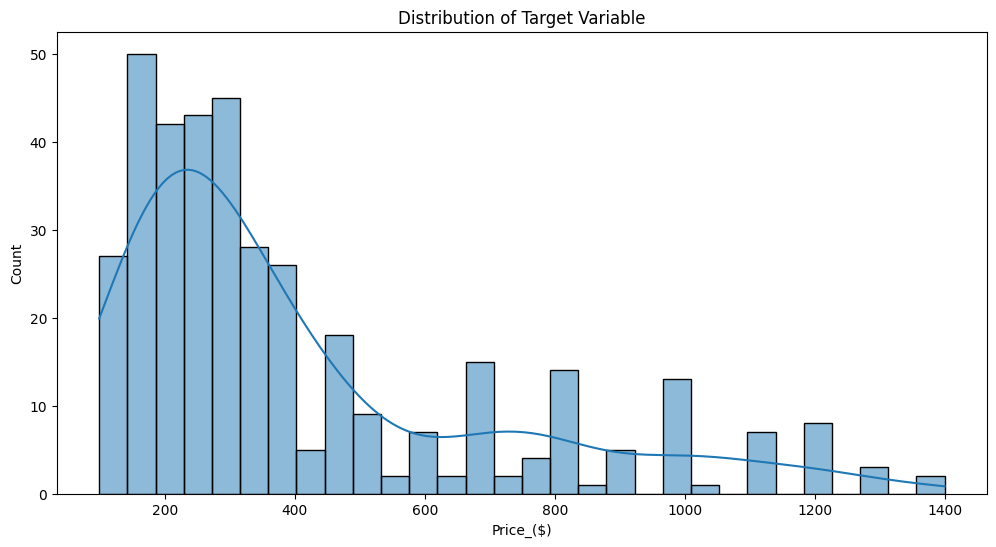

In [480]:
# Data Exploration
plt.figure(figsize=(12, 6))
sns.histplot(df['Price_($)'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

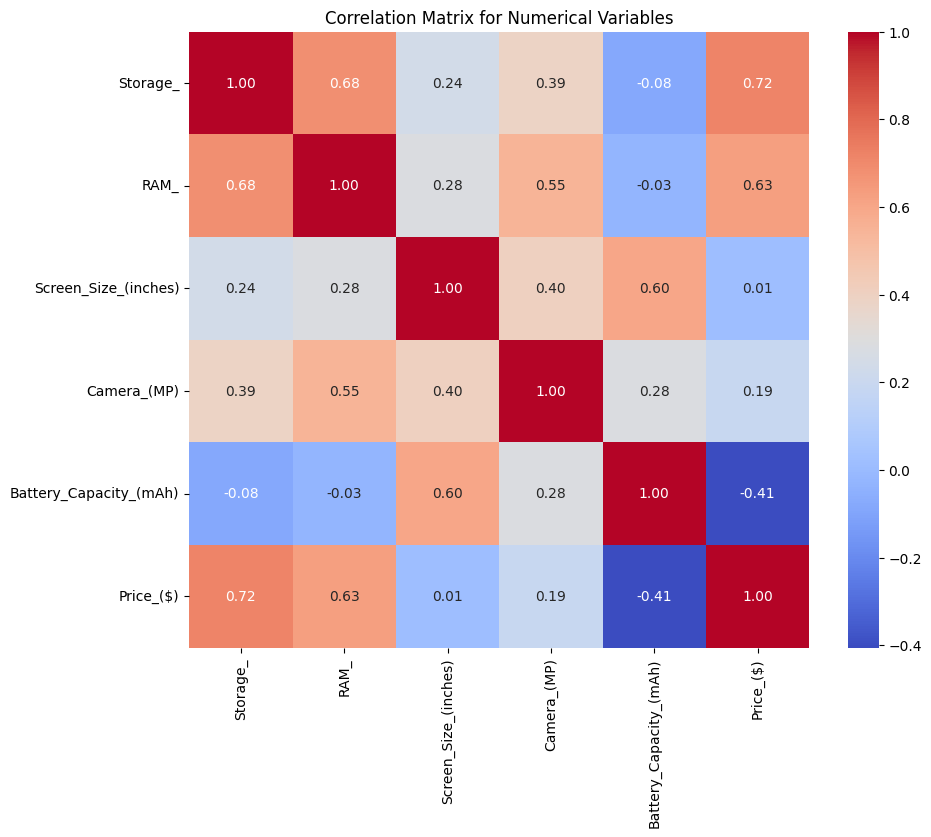

In [481]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Correlation Analysis for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()



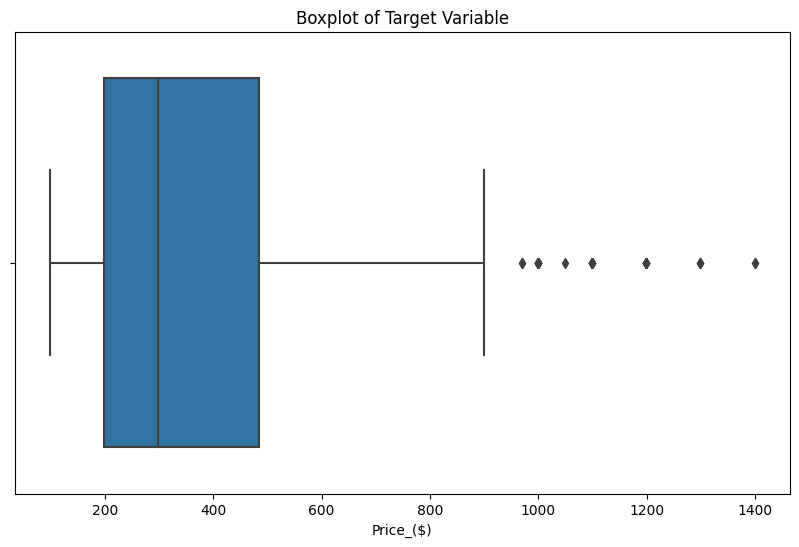

In [482]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price_($)'])
plt.title('Boxplot of Target Variable')
plt.show()

In [483]:
#Convert categorical values into numerical values 
le=LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])

In [484]:
X = df.drop(columns=['Price_($)'],axis = 1)
y = df['Price_($)']

In [485]:
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [486]:
# Robust Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [487]:
# Evaluation
def evaluate_model(model, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return r2, mae, mse

## Linear regression

In [488]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)

## Decision Tree Regression

In [489]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)
dt_reg_pred = dt_reg.predict(X_test_scaled)

## Random Forest Regression

In [490]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)
rf_reg_pred = rf_reg.predict(X_test_scaled)

## Support Vector Machine (SVM) Regression

In [491]:
svm_reg = SVR()
svm_reg.fit(X_train_scaled, y_train)
svm_reg_pred = svm_reg.predict(X_test_scaled)

## Gradient Boosting Regression

In [492]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)
gb_reg_pred = gb_reg.predict(X_test_scaled)

## Lasso Regression model

In [493]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

In [494]:
# Evaluate Linear Regression
linear_reg_metrics = evaluate_model(linear_reg, y_test, linear_reg_pred)

# Evaluate Decision Tree Regression
dt_reg_metrics = evaluate_model(dt_reg, y_test, dt_reg_pred)

# Evaluate Random Forest Regression
rf_reg_metrics = evaluate_model(rf_reg, y_test, rf_reg_pred)

# Evaluate SVM Regression
svm_reg_metrics = evaluate_model(svm_reg, y_test, svm_reg_pred)

# Evaluate Gradient Boosting Regression
gb_reg_metrics = evaluate_model(gb_reg, y_test, gb_reg_pred)

#Evaluate lasso regression model 
lasso_metrics = evaluate_model(lasso_model, y_test, lasso_pred)

In [495]:
# Display Results
results = {
    'Linear Regression': linear_reg_metrics,
    'Decision Tree Regression': dt_reg_metrics,
    'Random Forest Regression': rf_reg_metrics,
    'SVM Regression': svm_reg_metrics,
    'Gradient Boosting Regression': gb_reg_metrics,
    'Lasso Regression': lasso_metrics  # Add Lasso Regression to the results
}

for model, metrics in results.items():
    print(f"{model} Metrics:")
    print(f"R-squared: {metrics[0]:.4f}")
    print(f"MAE: {metrics[1]:.4f}")
    print(f"MSE: {metrics[2]:.4f}")
    print("\n")


Linear Regression Metrics:
R-squared: 0.7243
MAE: 116.7530
MSE: 26074.9130


Decision Tree Regression Metrics:
R-squared: 0.7581
MAE: 74.8421
MSE: 22880.0117


Random Forest Regression Metrics:
R-squared: 0.7835
MAE: 72.9273
MSE: 20473.4171


SVM Regression Metrics:
R-squared: -0.0953
MAE: 213.6427
MSE: 103595.5976


Gradient Boosting Regression Metrics:
R-squared: 0.8578
MAE: 65.4441
MSE: 13452.3556


Lasso Regression Metrics:
R-squared: 0.7239
MAE: 116.4848
MSE: 26111.0243




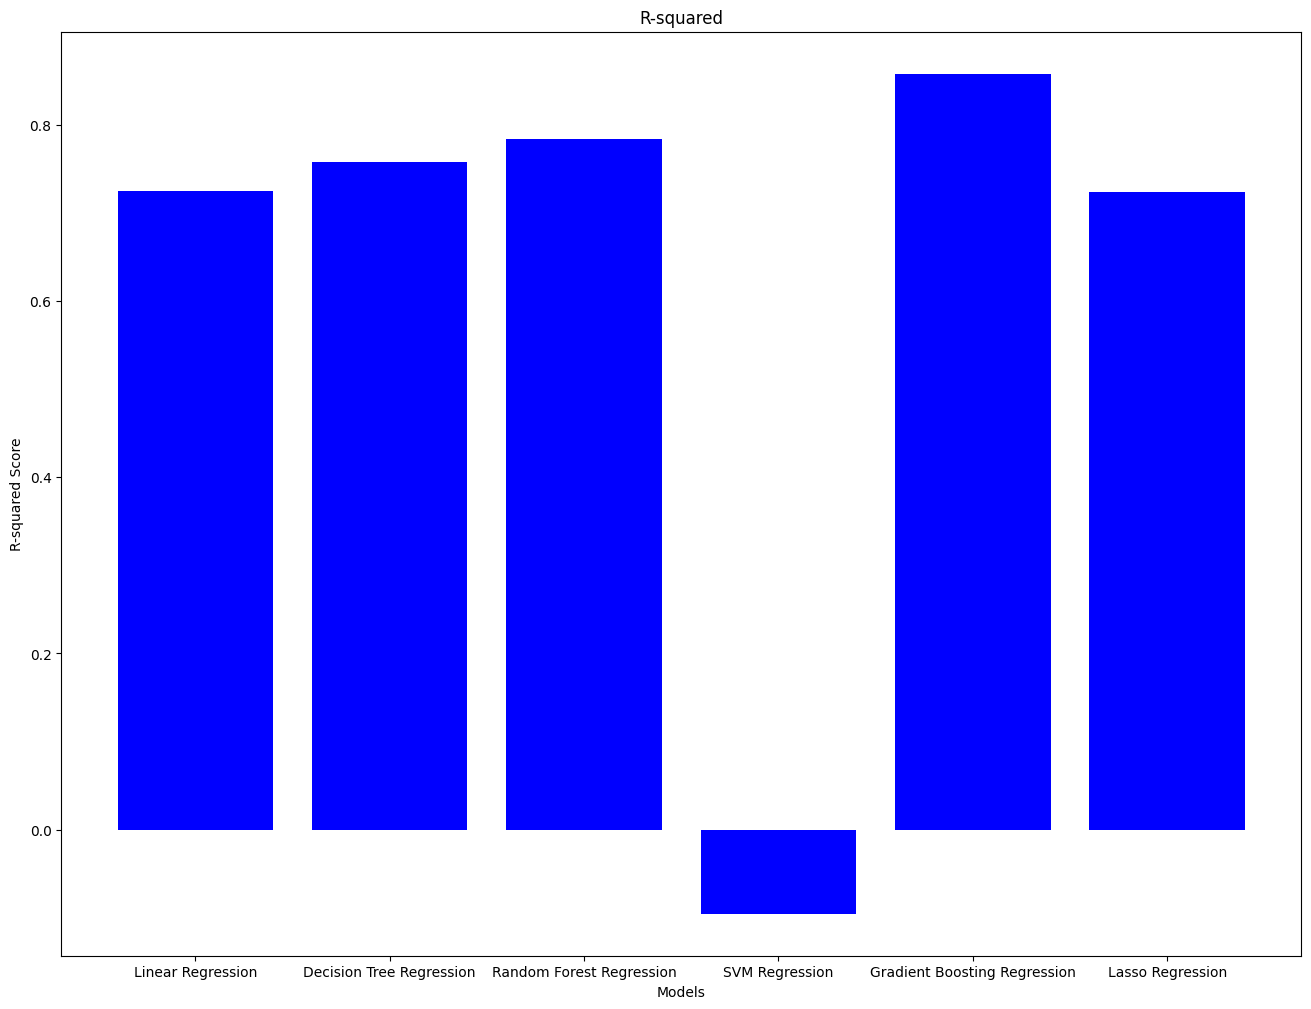

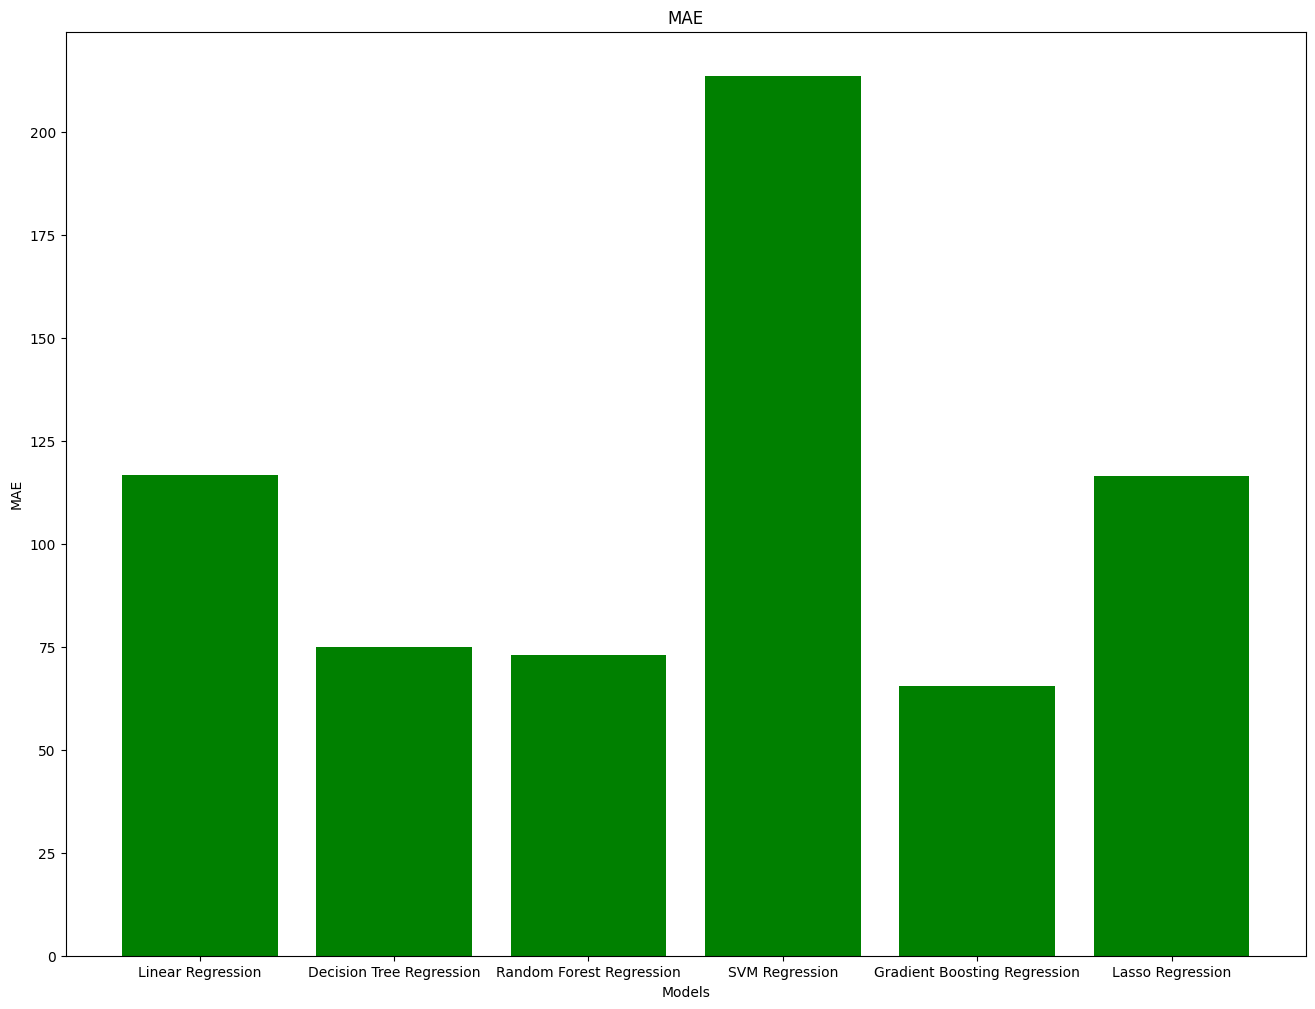

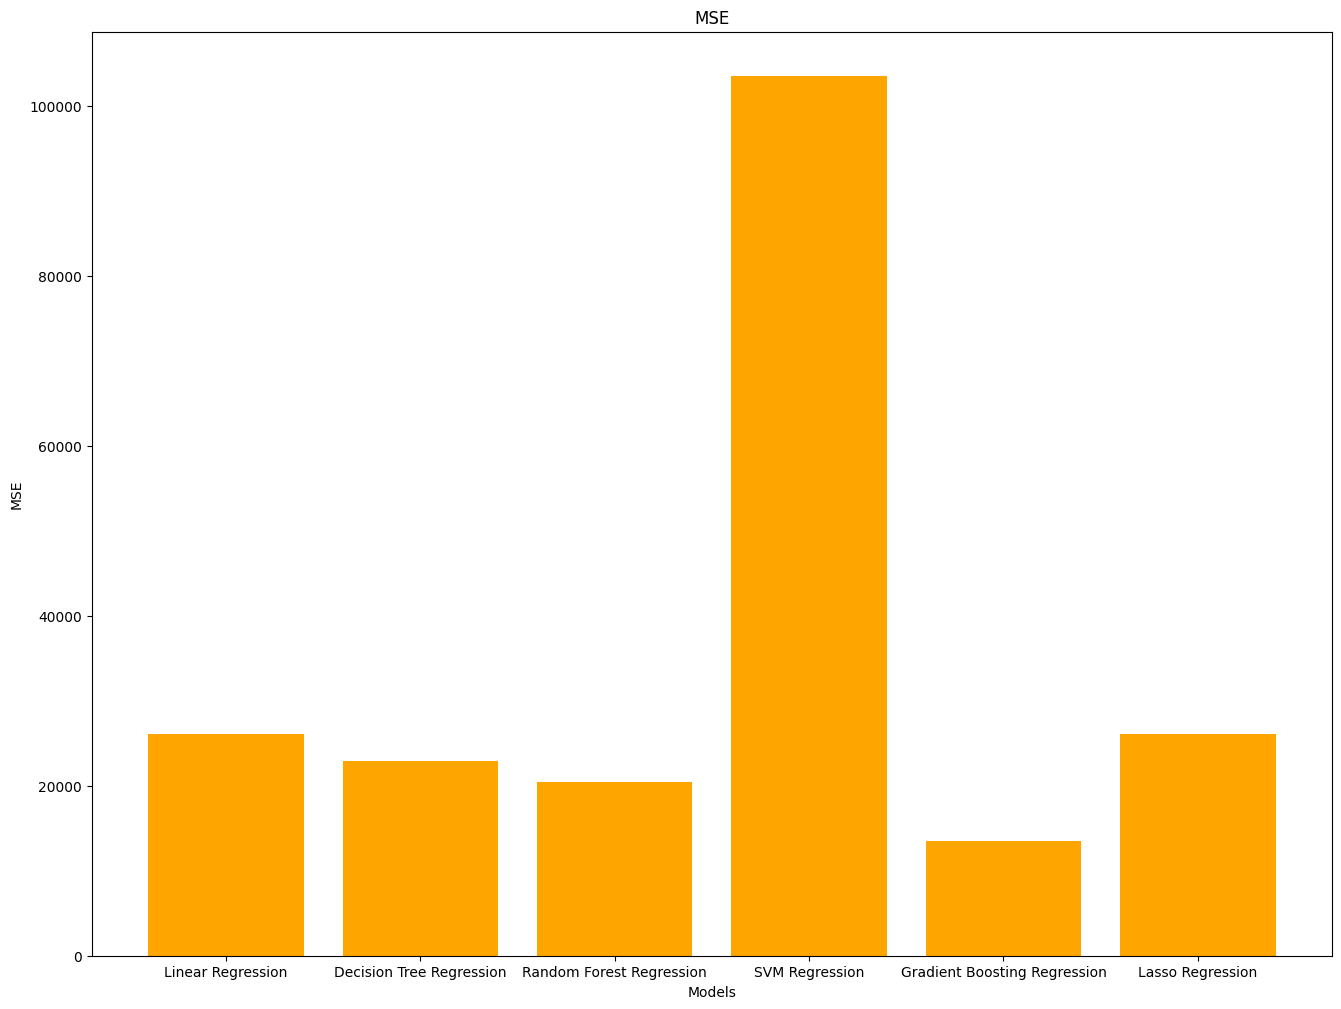

In [496]:
# Extract metrics for visualization
r_squared_values = [metrics[0] for metrics in results.values()]
mae_values = [metrics[1] for metrics in results.values()]
mse_values = [metrics[2] for metrics in results.values()]

# Model names
models = list(results.keys())

# Create separate plots for each metric
plt.figure(figsize=(16, 12))

# R-squared
plt.bar(models, r_squared_values, color='blue')
plt.title('R-squared')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.show()

# MAE
plt.figure(figsize=(16, 12))
plt.bar(models, mae_values, color='green')
plt.title('MAE')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.show()

# MSE
plt.figure(figsize=(16, 12))
plt.bar(models, mse_values, color='orange')
plt.title('MSE')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()
